In [ ]:
# SENTIMENTAL ANALYSIS FROM OUR BLOG SPOT 
!pip install scikit-learn
!pip install pandas
%pip install mysql-connector-python

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [2]:
#TRAINING OUR MODEL
# Load the data
data = pd.read_csv("senti.csv")

# Split the data into training and testing sets
train_data = data.iloc[:800, :]
test_data = data.iloc[800:, :]

# Create a CountVectorizer object to convert the text data into numerical vectors
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english')

# Convert the text data into numerical vectors
X_train = vectorizer.fit_transform(train_data.Sentence)
y_train = train_data.Sentiment

X_test = vectorizer.transform(test_data.Sentence)
y_test = test_data.Sentiment

# Create a Naive Bayes classifier object
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the sentiment of the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = (y_pred == y_test).mean()

print("Accuracy:", accuracy)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Accuracy: 0.6291154303847679


In [3]:
# Connect to the database
#mydb = mysql.connector.connect(
#  user="yourusername",
#  password="yourpassword",
#  database="yourdatabase"
#)

# Create a cursor object to interact with the database
#mycursor = mydb.cursor()

# Execute a SELECT query to retrieve user comments from a table named 'comments'
#mycursor.execute("SELECT comment_text FROM comments")

# Fetch all the rows returned by the query
#rows = mycursor.fetchall()

# Close the cursor and database connection
#mycursor.close()
#mydb.close()

# Convert the fetched rows to a pandas dataframe
comments_df = pd.DataFrame(rows, columns=["Comment"])

# Use the trained classifier to predict the sentiment of the comments
comment_vectors = vectorizer.transform(comments_df["Comment"])
comments_df["Sentiment"] = clf.predict(comment_vectors)

# Display the sentiment distribution of the comments
print(comments_df["Sentiment"].value_counts())

sentiments = []
for comment in comments:
    # Preprocess the comment text (e.g. remove stop words, punctuation, etc.)
    comment = ' '.join([word for word in text.lower().split() if word not in stop_words and word not in punctuation])
    # Convert the preprocessed text into a numerical vector using CountVectorizer
    x = vectorizer.transform([comment])
    # Predict the sentiment using the trained classifier
    senti = clf.predict(x)
    senti.append(senti[0])

# Count the number of positive and negative comments
n_positive = senti.count('positive')
n_negative = senti.count('negative')

# Create a pie chart
plt.pie([n_positive, n_negative], labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.show()

NameError: name 'rows' is not defined

In [ ]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [4]:
#Sentiment analysis from newsapi.org
!pip install nltk
!pip install newsapi-python


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nltk
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
nltk.download('vader_lexicon')

d:\programming\python\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alist\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

2023-04-26T11:16:00Z The Ratings Game: Microsoft just delivered ‘exactly what software needed’ amid ‘doom and gloom’ Microsoft offered some welcome relief to the software sector overnight against what one analyst described as a "doom and gloom" backdrop. {'neg': 0.149, 'neu': 0.708, 'pos': 0.144, 'compound': -0.0516}
2023-04-27T10:36:04Z Another cloud provider runs to shelter from Microsoft's licensing practices First British biz joins Cloud Infrastructure Services Providers
A cloud group pressing the European Commission to address Microsoft's software licensing practices has snagged its first British member.… {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2023-04-27T16:11:54Z Is It Too Late to Buy Microsoft Stock? Microsoft reported better-than-expected quarterly financial results in late April. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2023-04-26T16:14:28Z Jim Cramer Loves This Tech Company, Calls Its Performance 'Unbelievable' It might be one to watch (despite the

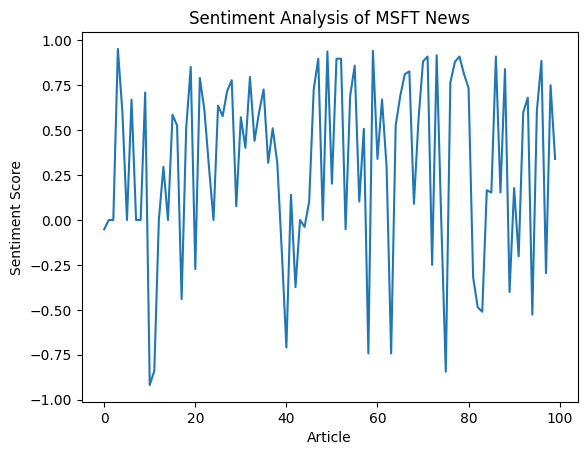

In [7]:
# Initialize the NLTK Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
# Initialize the NewsAPI client with your API key
newsapi = NewsApiClient(api_key='80b0c10b01ea4423b761bb74a152d3d6')
# Specify the stock you want to analyze
stock = 'MSFT'
# Get news articles related to the stock from the past 24 hours
articles = newsapi.get_everything(q=stock, language='en', from_param='2023-04-25', to='2023-04-28', sort_by='relevancy')
# Initialize counters for sentiment scores
sentiment_scores = []
positive_score = 0
negative_score = 0
neutral_score = 0
# Analyze the sentiment of each article
for article in articles['articles']:
    text = article['title'] + ' ' + article['description']
    sentiment = sia.polarity_scores(text)
    sentiment_scores.append(sentiment['compound'])
    print(article['publishedAt'], text, sentiment)
    # Increment the appropriate counter based on the sentiment score
    if sentiment['compound'] > 0.05:
        positive_score += 1
    elif sentiment['compound'] < -0.05:
        negative_score += 1
    else:
        neutral_score += 1
# Compute the total sentiment score
total_score = positive_score - negative_score
# Print the sentiment score
print(f'The sentiment score for {stock} is {total_score}.')
# Plot the sentiment scores on a graph
plt.plot(sentiment_scores)
plt.xlabel('Article')
plt.ylabel('Sentiment Score')
plt.title(f'Sentiment Analysis of {stock} News')
plt.savefig('D:\programing\year 2 project\static\css\image\senti.png')
plt.show()